Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')
Model accuracy score with 10 decision-trees : 0.9247


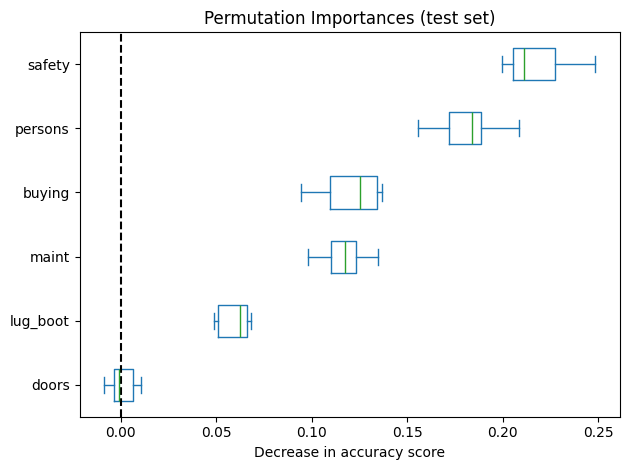

In [22]:
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from ucimlrepo import fetch_ucirepo
import os
import pdpbox as pdp
from interpret import show
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import numpy as np
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import statsmodels
import seaborn as sns
import pandas as pd
import pandas as pd
from pdpbox import pdp, get_example, info_plots
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
set_visualize_provider(InlineProvider())
# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets
feature_names = car_evaluation.feature_names
print(X.columns)

# variable information
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

encoder = ce.OrdinalEncoder(
    cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
# import Random Forest classifier


# instantiate the classifier
rfc = RandomForestClassifier(n_estimators=10, random_state=0)


# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(
    accuracy_score(y_test, y_pred)))
result = permutation_importance(
    rfc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()



In [23]:
pdp_feat_67_rf = pdp.PDPIsolate(
    model=rfc,
    df=X_train,
    model_features=X_train.columns,
    feature="safety",
    feature_name="safety",
    chunk_size=10000,
)

fig, axes = pdp_feat_67_rf.plot(
    plot_lines=True,
    frac_to_plot=100,
    plot_pts_dist=True,
    to_bins=True,
    ncols=3,
    figsize=(1200, 400),
    show_percentile=False,
    plot_params={"pdp_hl": True, "gaps": {"outer_x": 0.06, "inner_y": 0.02, "outer_y": 0.1}},
    engine='plotly',
    template='plotly_white'
)
fig


obtain pred_func from the provided model.


  0%|          | 0/4 [00:00<?, ?it/s]